# 1. problem statement

The aim of our study is to answer the below research questions:

a) Does price vary with Airlines?

b) Does ticket price change based on the departure time and arrival time?

c) How the price changes with change in Source and Destination?

d) How does the ticket price vary between Economy and Business class?

# 2) DATA COLLECTION
reference : https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

dataset contains  rows and   columns

# 3)Dataset Information - EDA

The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.


In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [127]:
df=pd.read_excel('flight_price.xlsx')
print(df.shape)
df.head()

(10683, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# 4) Data checks
1) missing value check - check outlier - check imbalenced dataset
2) check for duplication
3) check datatype
4) check no. of category in each columns
5) check unique category for each categorical columns
6) discriptive statitics


In [128]:
# 1) missing value check - check outlier - check imbalenced dataset
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [129]:
# observation 
# - 1 (Nan) missing value in Route 
# - 1 (Nan) missing value in Total_Stops 

In [130]:
#filling missing value in Route 

In [131]:
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [133]:
#finding mode value for the particular type of record for fill there
df[(df['Airline']=='Air India') & (df['Source']=='Delhi') & (df['Destination']=='Cochin') & (df['Duration']=='23h 40m') & (df['Price']<=7480)].mode()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Air India,27/03/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 28 Mar,23h 40m,1 stop,No info,7480


In [134]:
# fill the missing value
df.loc[9039,'Route']='DEL → MAA → COK'

In [135]:
df[df['Route'].isna()] #no missing value here, we filled it

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [136]:
#filling missing value in Total_Stops 

In [137]:
#checking which record having missing value 
df[df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [138]:
df.loc[9039,'Total_Stops']='1 stop'

In [139]:
df[df['Total_Stops'].isna()] #no missing value here, we filled it

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [140]:
# or you can simply drop that record by - df.dropna()

In [141]:
# 2) check for duplication

In [142]:
df.duplicated().sum()

220

In [143]:
# observaion- it has 220 duplicate records

In [144]:
# droping duplicate records
df = df.drop_duplicates()
df.duplicated().sum()
# observaion-now, it has 0 duplicate records

0

In [145]:
# 3) check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10463 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10463 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.9+ KB


In [146]:
# observation - 3) check datatype
# all independent features are object type 
# the one dependent feature is int64 type

In [147]:
# 4) check no. of category in each columns
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [148]:
# 5) check unique category for each categorical columns
[(feature,df[feature].unique()) for feature in df.columns if df[feature].dtype == 'O']

[('Airline',
  array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
         'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
         'Vistara Premium economy', 'Jet Airways Business',
         'Multiple carriers Premium economy', 'Trujet'], dtype=object)),
 ('Date_of_Journey',
  array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
         '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
         '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
         '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
         '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
         '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
         '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
         '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
         '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
         '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)),
 ('So

In [149]:
# 6) discriptive statitics
df
df.describe()
# df['Airline'].describe()

,Price
count,10463.000000
mean,9026.642454
std,4624.653227
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12343.500000
max,79512.000000


In [150]:
# 7). seggregating and  EXPLORING DATA

In [151]:
# define numerical & categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print(f'We have {len(numeric_features)} numerical features :{numeric_features}')
print(f'We have {len(categorical_features)} categorical features :{categorical_features}')  

We have 1 numerical features :['Price']
We have 10 categorical features :['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


In [152]:
# proportion of count data of each categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('----------------------------')

Jet Airways                          35.362707
IndiGo                               19.525949
Air India                            16.199943
Multiple carriers                    11.430756
SpiceJet                              7.789353
Vistara                               4.568479
Air Asia                              3.048839
GoAir                                 1.854153
Multiple carriers Premium economy     0.124247
Jet Airways Business                  0.057345
Vistara Premium economy               0.028672
Trujet                                0.009557
Name: Airline, dtype: float64
----------------------------
6/06/2019     4.683169
18/05/2019    4.644939
9/06/2019     4.635382
12/06/2019    4.616267
21/05/2019    4.606709
9/05/2019     4.453790
21/03/2019    3.937685
15/05/2019    3.842110
27/05/2019    3.526713
27/06/2019    3.239989
24/06/2019    3.153971
1/06/2019     3.153971
3/06/2019     3.115741
15/06/2019    3.001051
24/03/2019    3.001051
6/03/2019     2.886361
27/03/201

# 5) visualization

### Univariate Analysis
The purpose of univariate analysis is to understand the distribution of values for a single variable.

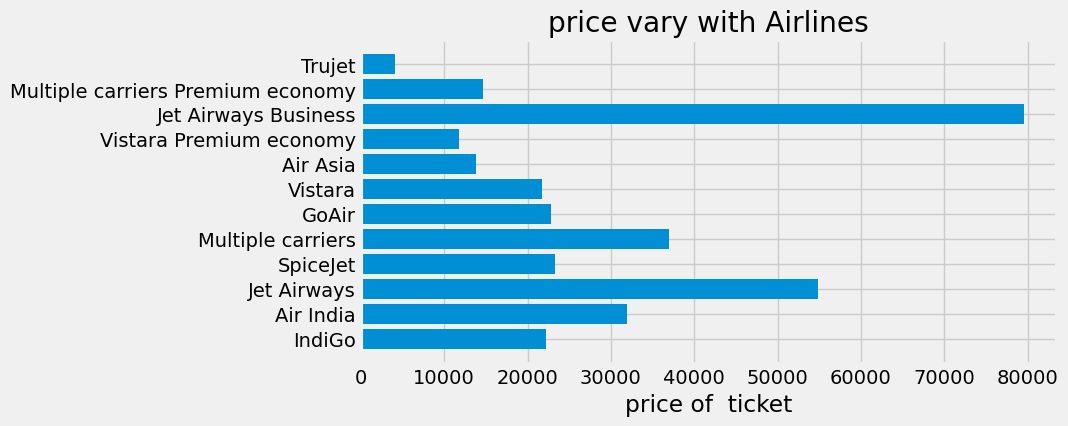

In [153]:
plt.figure(figsize=(8, 4))
plt.style.use('fivethirtyeight')
plt.barh(y=df['Airline'], width=df['Price'])
plt.title('price vary with Airlines')
plt.xlabel("price of  ticket")
plt.show()
# a) Does price vary with Airlines?

In [154]:
# observation- The graph you sent shows that there is a significant difference in price between different airlines for the same route.
# For example, Trujet offers the lowest price for a ticket, while Multiple carriers Premium economy offers the highest price.

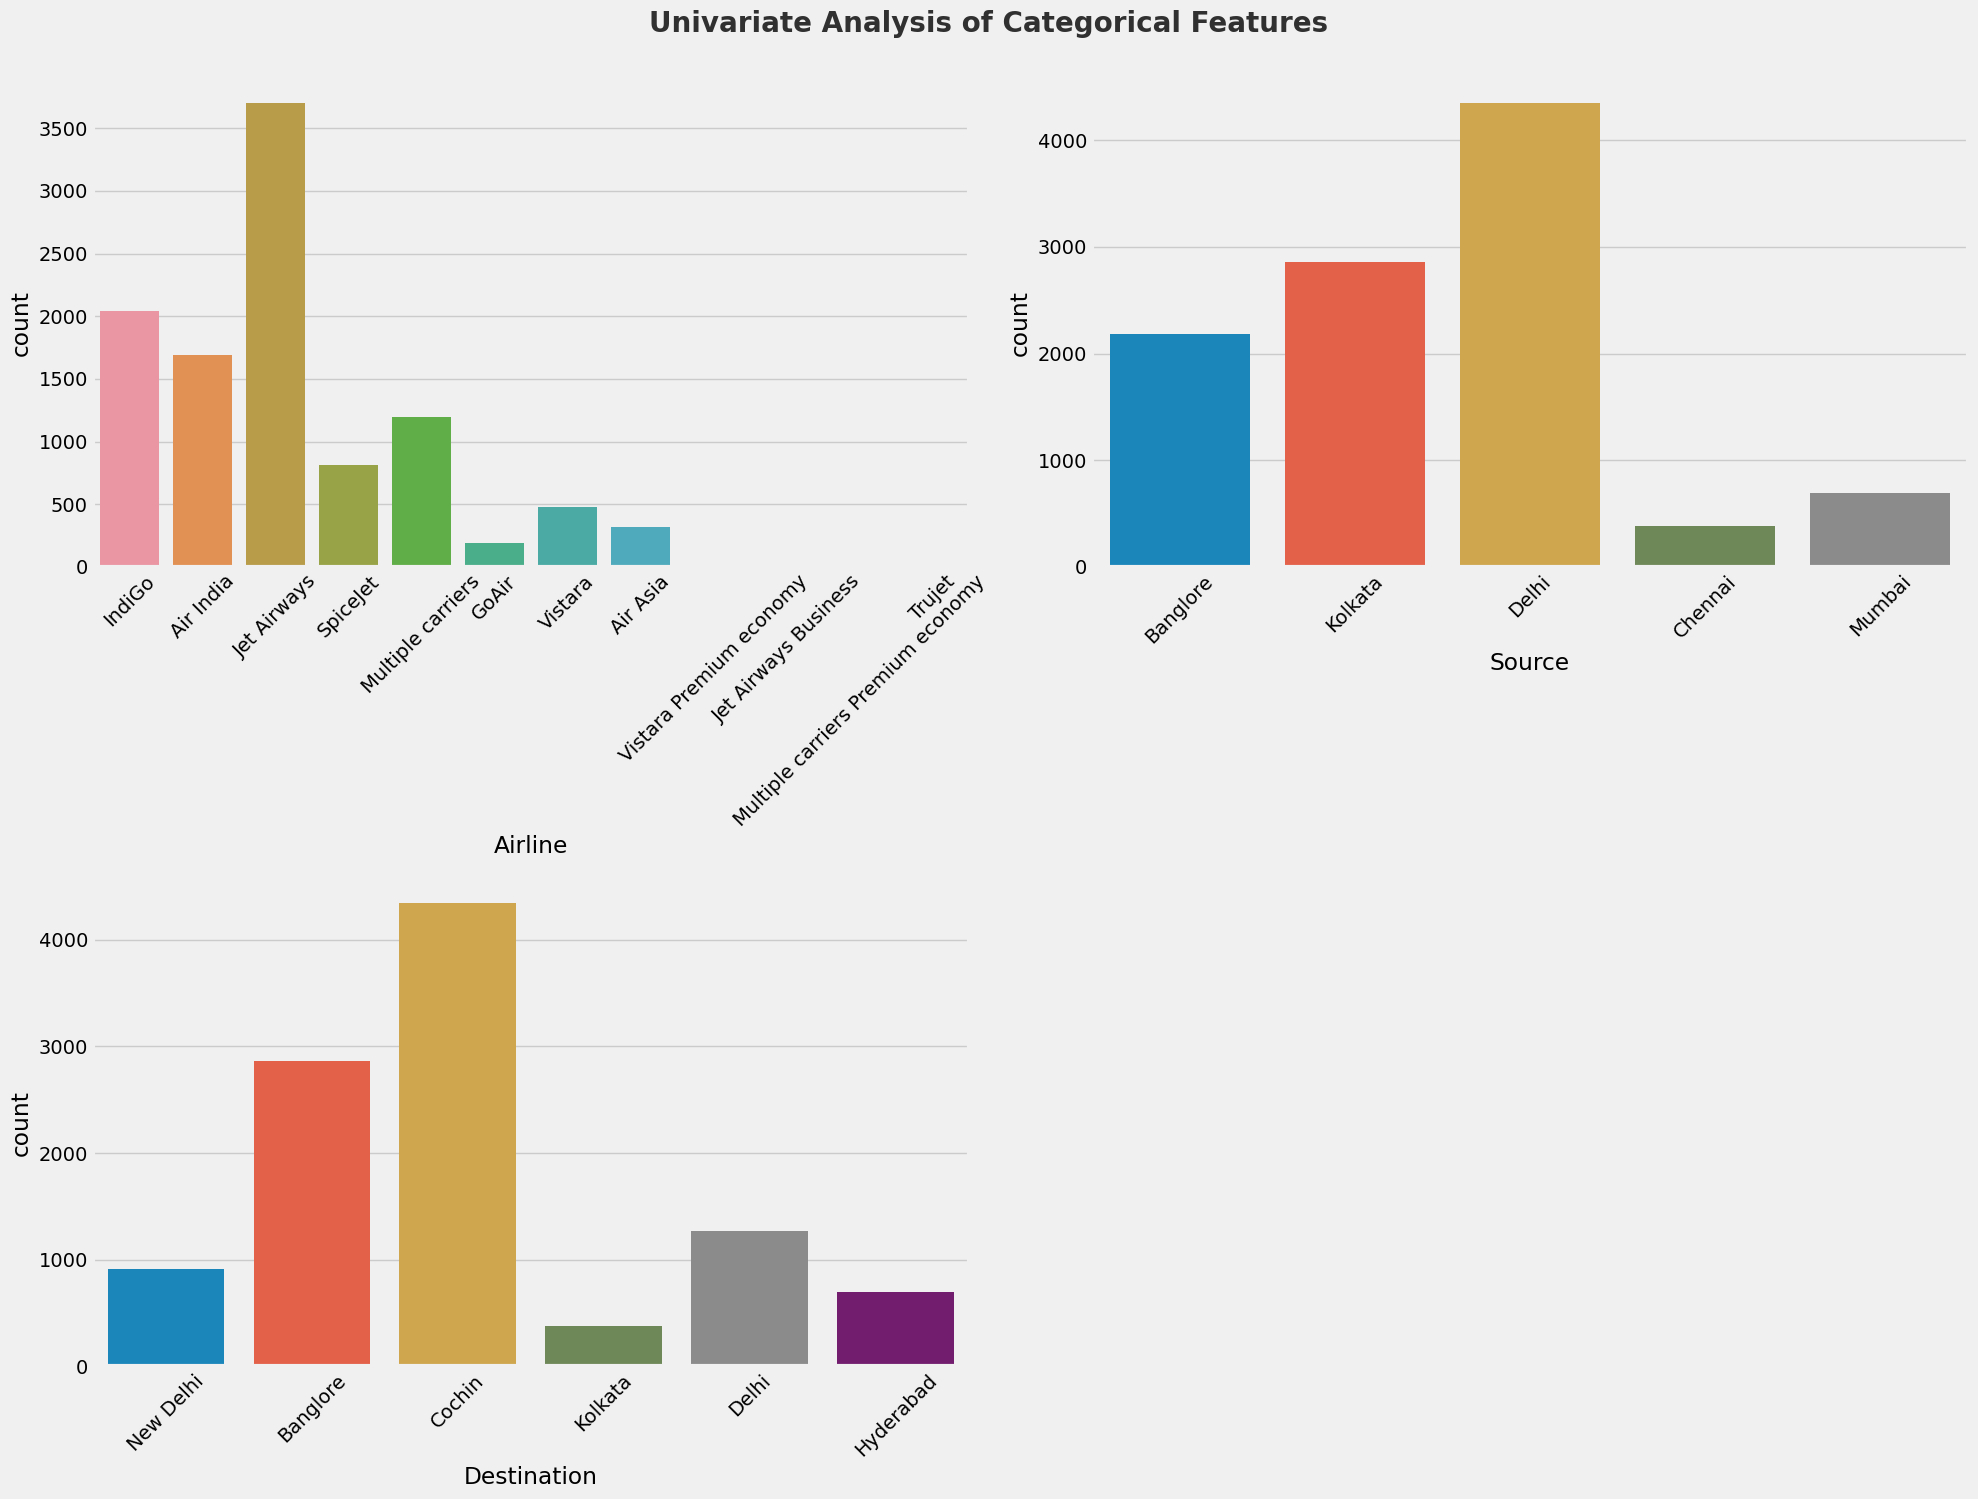

In [155]:
# Categorical Features
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'Airline','Source', 'Destination']
for i in range(0, len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Multivariate Analysis
Multivariate analysis is the analysis of more than one variable.
Check Multicollinearity for Categorical features
A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

A chi-square statistic is one way to show a relationship between two categorical variables.

Here we test correlation of Categorical columns with Target column i.e Price

In [156]:


from scipy.stats import chi2_contingency
chi2_test=[]
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Price'],df[feature]))[1] <0.05:
        chi2_test.append('Rejet Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result=pd.DataFrame(data=[categorical_features,chi2_test]).T
result.columns=['Column','Hypothesis Result']
result

,Column,Hypothesis Result
0,Airline,Rejet Null Hypothesis
1,Date_of_Journey,Rejet Null Hypothesis
2,Source,Rejet Null Hypothesis
3,Destination,Rejet Null Hypothesis
4,Route,Rejet Null Hypothesis
5,Dep_Time,Rejet Null Hypothesis
6,Arrival_Time,Rejet Null Hypothesis
7,Duration,Rejet Null Hypothesis
8,Total_Stops,Rejet Null Hypothesis
9,Additional_Info,Rejet Null Hypothesis


### Initial Analysis Report
Report

Jet Airways has highest customer footfall followed by Indigo and Air India .
Jet Airways has a market Share of 35.36 % followed by Indigo which has a market share of 19.52 % and Air India Which has market share of 16.19 % .
Delhi has the highest footfall for source and Cochin has the highest footfall for Destination .

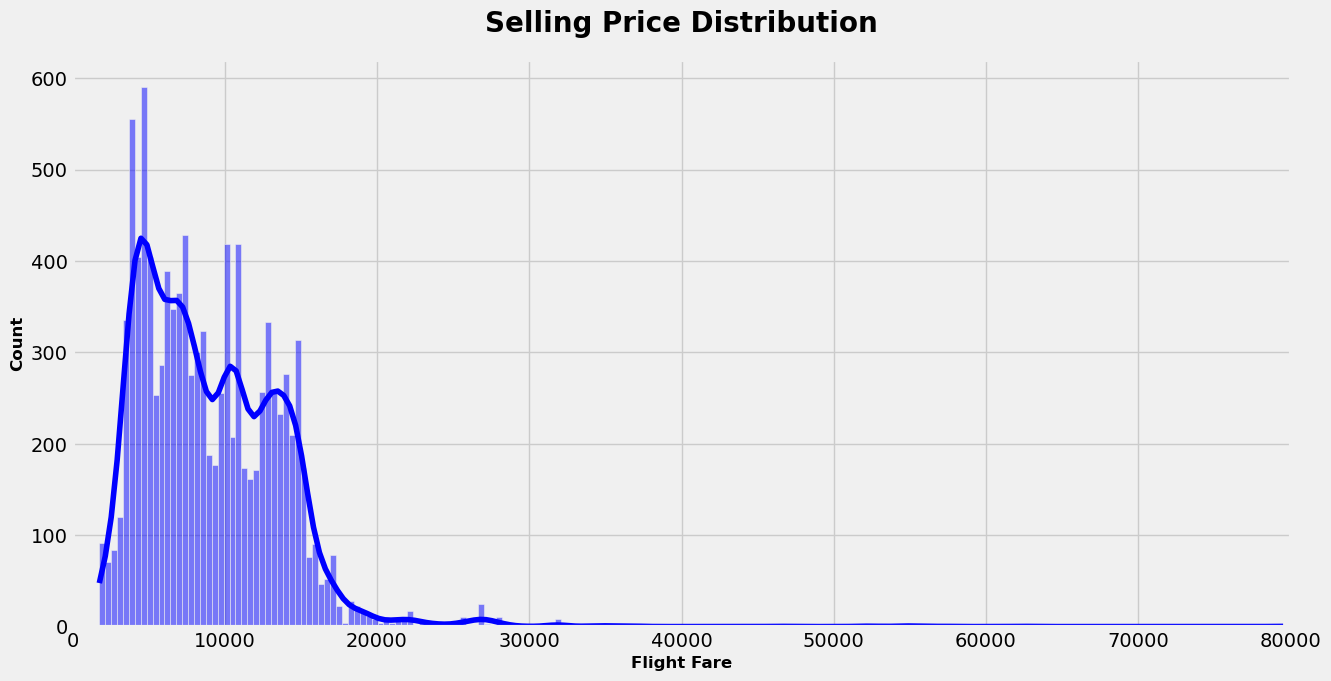

In [157]:
plt.subplots(figsize=(14,7))
sns.histplot(df.Price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Flight Fare", weight="bold", fontsize=12)
plt.xlim(0,80000)
plt.show()

In [ ]:
# From the chart it is clear that the Target Variable is Skewed

4.2 Top 10 Aviation Companies whose flight tickets are sold the most ?

In [158]:
df.Airline.value_counts()[0:10]

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Name: Airline, dtype: int64

 Most Sold Tickets are of Jet Airways Airline

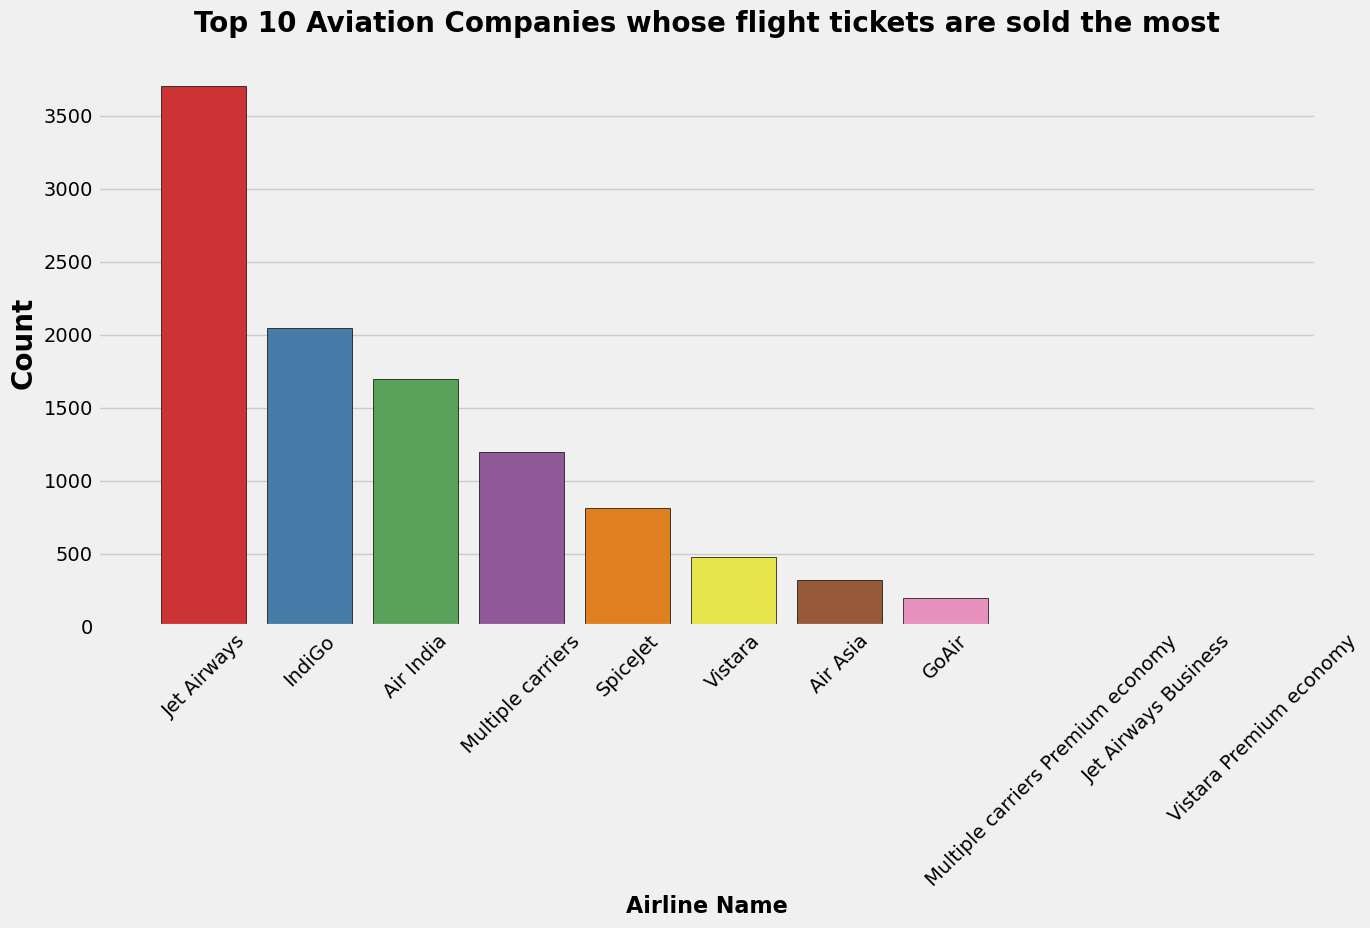

In [159]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Airline", data=df,ec = "black",palette="Set1",order = df['Airline'].value_counts().index)
plt.title("Top 10 Aviation Companies whose flight tickets are sold the most", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Airline Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

Check mean price of Jet Airways whose flight tickets are sold the most

In [ ]:
jet_airways = df[df['Airline'] == 'Jet Airways']['Price'].mean()
print(f'The mean price of Jet Airways Flight Tickets  is {jet_airways:.2f} Rupees')

### Report:

As per the Chart these are top 10 aviation companies whose tickets are sold the most.
Of the total flight tickets sold Jet Airways has the highest share followed by Indigo .
Mean Price of Jet Airways Flight Ticket is Rs 11,643.92.
This Feature has impact on the Target Variable.

 ###Costliest Aviation Companies and Costliest Flight Tickets

In [ ]:
aviation_company_airline = df.groupby('Airline').Price.max()
aviation_company= aviation_company_airline.to_frame().sort_values('Price',ascending=False)[0:10]
aviation_company

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x=aviation_company_airline.index, y=aviation_company_airline.values,ec = "black",palette="Set2")
plt.title("Airlines Company vs Flight Ticket Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Flight Ticket Price", weight="bold", fontsize=15)
plt.xlabel("Airlines Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


# Report:

Costliest Flight Tickets Sold is of Jet Airways Business .
Second Most Costliest Flight Tickets Sold is of Jet Airways .
As can be seen, the airline’s name is important. The most expensive option is ‘JetAirways Business.’ The cost of other carriers varies as well.
We’ll use one-hot encoding to handle the Airline variable because it’s Nominal Categorical Data (airline names have no order of any kind).

### Airline vs Price
Let’s see how the Airline variable is related to the Price variable.

In [ ]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 5)
plt.show()

From the Above we can see that Jet Airways Business has premium flight fares as compared to other Airlines

### Source vs Price

In [ ]:
sns.boxplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False))
plt.show()

From the Above we can see that Flights Originating From Banglore has high flight fares as compared to other sources from where flights are originating

# 6) Feature enngineering

In [161]:
# 1) Airline,source and destination to numerical by applying OneHotEncoder
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [163]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoded_df=pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

In [164]:
encoded_df.isna().sum()

Airline_Air Asia                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Banglore                              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_Banglore                         0
Destination_Cochin                           0
Destination_Delhi                            0
Destination_Hyderabad                        0
Destination_K

In [165]:
df.reset_index(drop=True, inplace=True)

encoded_df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
df_copy = pd.concat([df, encoded_df], axis=1)


In [166]:
# droping tranformed features
df_copy.drop(columns=['Airline','Source','Destination'],axis=1,inplace=True)
pd.set_option('display.max_columns',100)
df_copy=df_copy.copy()
df_copy.head(1)

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [167]:
# 2) convert Date_of_Journey to numerical columns 
df_copy['Date_of_Journey'].head(1)

0    24/03/2019
Name: Date_of_Journey, dtype: object

In [168]:
df_copy['Day']=df_copy['Date_of_Journey'].str.split('/').str[0]
df_copy['Month']=df_copy['Date_of_Journey'].str.split('/').str[1]
df_copy['Year']=df_copy['Date_of_Journey'].str.split('/').str[2]

In [169]:
df_copy['Day']=df_copy['Day'].astype(int)
df_copy['Month']=df_copy['Month'].astype(int)
df_copy['Year']=df_copy['Year'].astype(int)

 or you can use mehtod like ,but when we have outlier maybe it makes some troble
 
 df["journey_Date"]= pd.to_datetime(df['Date_of_Journey'], format= "%d/%m/%Y").dt.day
 
 df["journey_Month"]= pd.to_datetime(df['Date_of_Journey'], format= "%d/%m/%Y").dt.month
 
 df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
 
 df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [170]:
#3) droping Date_of_Journey feature after converting it to 3 features namely ,Day,Month,year
df_copy.drop('Date_of_Journey',axis=1,inplace=True)
df_copy.head(1)

,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day,Month,Year
0,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24,3,2019


In [171]:
#4) we are just droping this feature here , because Route doesn't give much info , we already have source , destination and Total_Stops
df_copy.drop('Route',axis=1,inplace=True)
df_copy.head(1)

,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day,Month,Year
0,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24,3,2019


In [172]:
#5) transforming Dep_Time
df_copy['Departure_hour']=df_copy['Dep_Time'].str.split(':').str[0]
df_copy['Departure_minute']=df_copy['Dep_Time'].str.split(':').str[1]

In [173]:
df_copy['Departure_hour']=df_copy['Departure_hour'].astype(int)
df_copy['Departure_minute']=df_copy['Departure_minute'].astype(int)

In [174]:
df_copy.drop('Dep_Time',axis=1,inplace=True)

In [175]:
# 6) transforming Arrival_Time

# we have many type of values like 20:10 , 12:43 mar ,(mar is unwanted). so here we just need the first portion of time , 
df_copy['Arrival_Time']=df_copy['Arrival_Time'].str.split(' ').str[0]

In [176]:
df_copy['Arrival_hour']=df_copy['Arrival_Time'].str.split(':').str[0].astype(int)
df_copy['Arrival_minute']=df_copy['Arrival_Time'].str.split(':').str[1].astype(int)

In [177]:
df_copy.drop('Arrival_Time',axis=True,inplace=True)
df_copy.head(1)

,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day,Month,Year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,2h 50m,non-stop,No info,3897,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24,3,2019,22,20,1,10


In [178]:
# 7) transforming Duration

### we had a record which is outlier, so we are droping that
df_copy=df_copy.drop(index=6397)
df_copy.reset_index(drop=True, inplace=True)
df_copy.iloc[6397]

### we had some record where minute is blank , so we adding 0m there
# Check which rows do not end with 'm'
condition = ~df_copy['Duration'].str.endswith('m')
# Use .loc to modify the 'Duration' column for the selected rows
df_copy.loc[condition, 'Duration'] = df_copy.loc[condition, 'Duration'] + ' 0m'

In [179]:
df_copy['Duration_hour']=df_copy['Duration'].str.split(' ').str[0].str.split('h').str[0].astype(int)
df_copy['Duration_minute']=df_copy['Duration'].str.split(' ').str[1].str.split('m').str[0].astype(int)
df_copy.head(2)

,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day,Month,Year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,2h 50m,non-stop,No info,3897,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24,3,2019,22,20,1,10,2,50
1,7h 25m,2 stops,No info,7662,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,5,2019,5,50,13,15,7,25


In [180]:
df_copy.drop(columns='Duration',axis=1,inplace=True)
df_copy.head(2)

,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day,Month,Year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,non-stop,No info,3897,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24,3,2019,22,20,1,10,2,50
1,2 stops,No info,7662,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,5,2019,5,50,13,15,7,25


In [181]:
# 7) transforming Total_Stops

In [182]:
df_copy['Total_Stops']=df_copy['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [183]:
df_copy

,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day,Month,Year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,0,No info,3897,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24,3,2019,22,20,1,10,2,50
1,2,No info,7662,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,5,2019,5,50,13,15,7,25
2,2,No info,13882,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9,6,2019,9,25,4,25,19,0
3,1,No info,6218,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,5,2019,18,5,23,30,5,25
4,1,No info,13302,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,0,No info,4107,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,4,2019,19,55,22,25,2,30
10458,0,No info,4145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,27,4,2019,20,45,23,20,2,35
10459,0,No info,7229,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,27,4,2019,8,20,11,20,3,0
10460,0,No info,12648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,3,2019,11,30,14,10,2,40


In [184]:
# 7) transforming Additional_Info  - here 78.206844 info is null so we can drop
df_copy.drop(columns='Additional_Info',axis=1,inplace=True)

In [185]:
df=df_copy.copy()
df=df.drop_duplicates()
df

,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day,Month,Year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,0,3897,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24,3,2019,22,20,1,10,2,50
1,2,7662,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,5,2019,5,50,13,15,7,25
2,2,13882,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9,6,2019,9,25,4,25,19,0
3,1,6218,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,5,2019,18,5,23,30,5,25
4,1,13302,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,0,4107,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,4,2019,19,55,22,25,2,30
10458,0,4145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,27,4,2019,20,45,23,20,2,35
10459,0,7229,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,27,4,2019,8,20,11,20,3,0
10460,0,12648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,3,2019,11,30,14,10,2,40


# bivariate statistic
Correlation:
Correlation is a technique for determining the link between two variables, which is useful in real life since it allows us to forecast the value of one variable using other factors that are connected with it. Because two variables are involved, it is a sort of bivariate statistic.

<Axes: >

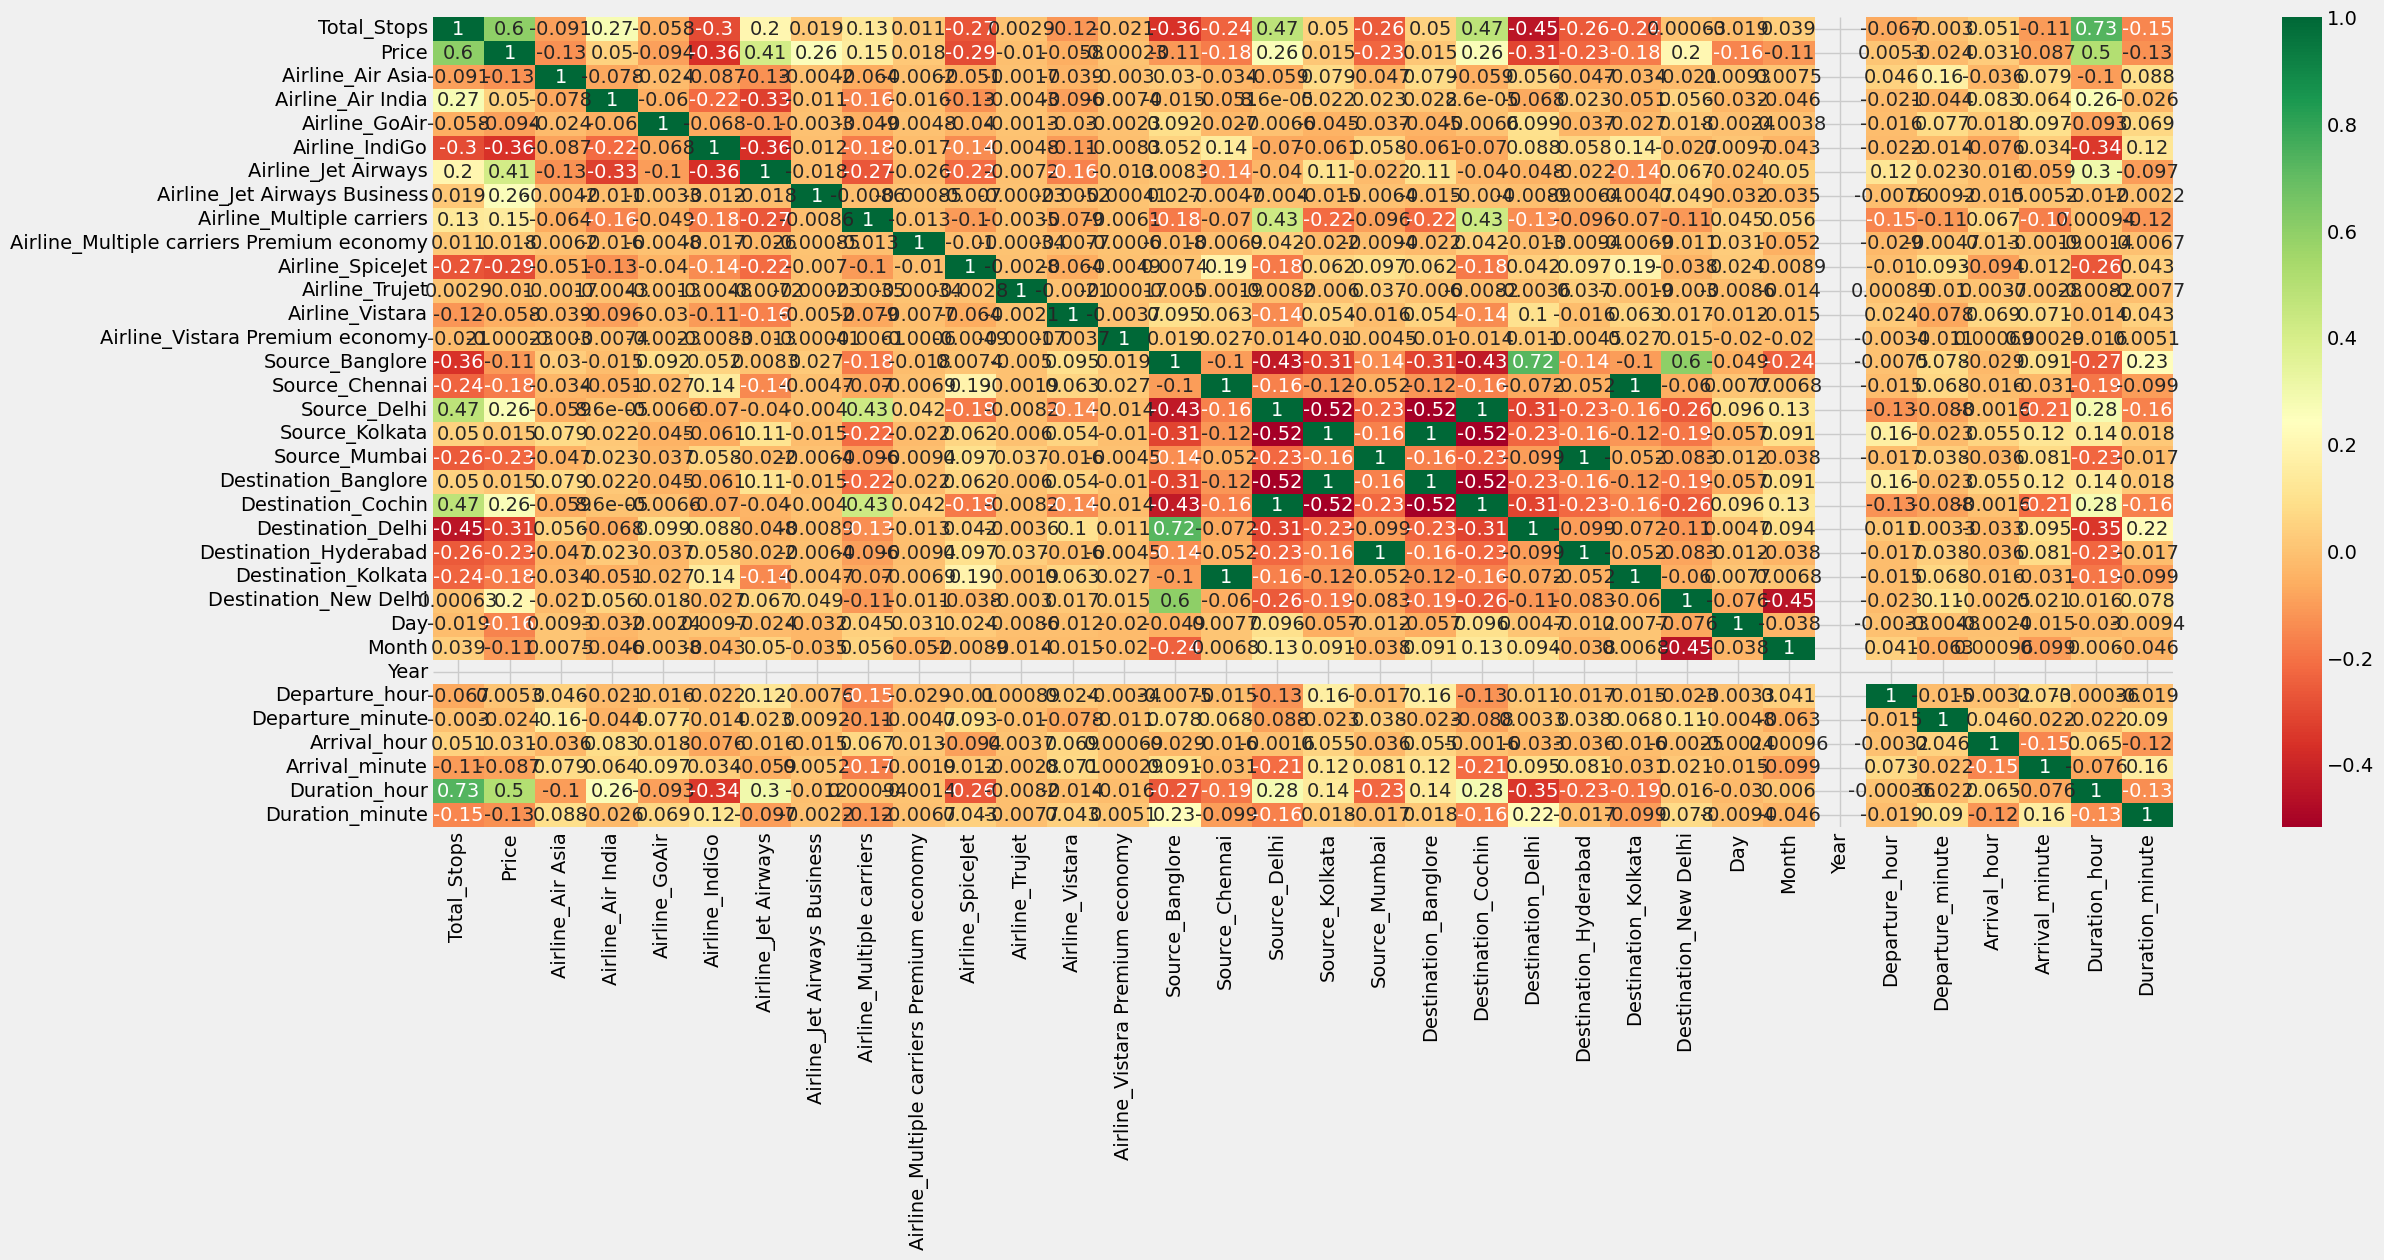

In [189]:
# Heatmap
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot = True, cmap = "RdYlGn")

In [191]:
df.columns

Index(['Total_Stops', 'Price', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Day', 'Month', 'Year', 'Departure_hour',
       'Departure_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour',
       'Duration_minute'],
      dtype='object')

<Axes: >

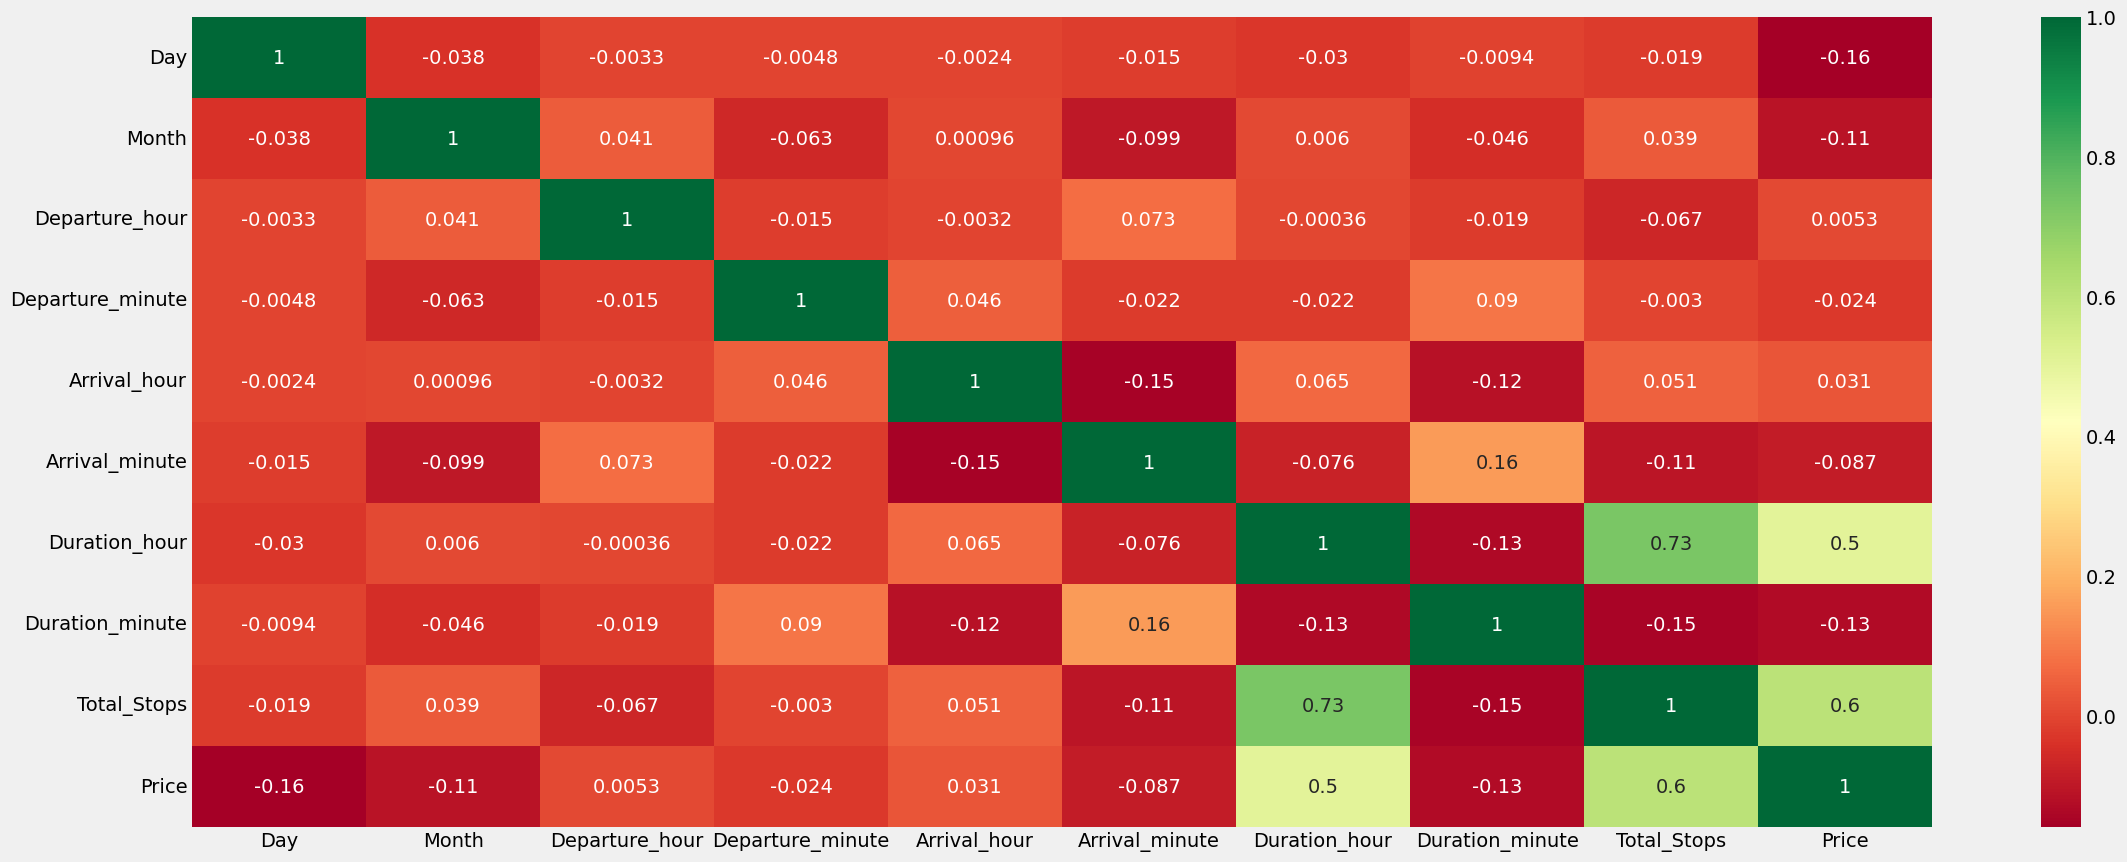

In [197]:
column_names = [
    'Day', 'Month', 'Departure_hour',
    'Departure_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour',
    'Duration_minute', 'Total_Stops', 'Price'
]

df_copy=df[column_names]

# Heatmap
plt.figure(figsize=(25,10))
sns.heatmap(df_copy.corr(),annot = True, cmap = "RdYlGn")